In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
from collections import Counter

In [2]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

## Rule 110 MIPT moments nsteps=0.5*Bsites
Asites=1,Bsites=100*i,nsteps=0.5*Bsites, pertb=0:0.25:0.01, 1-5

0.26


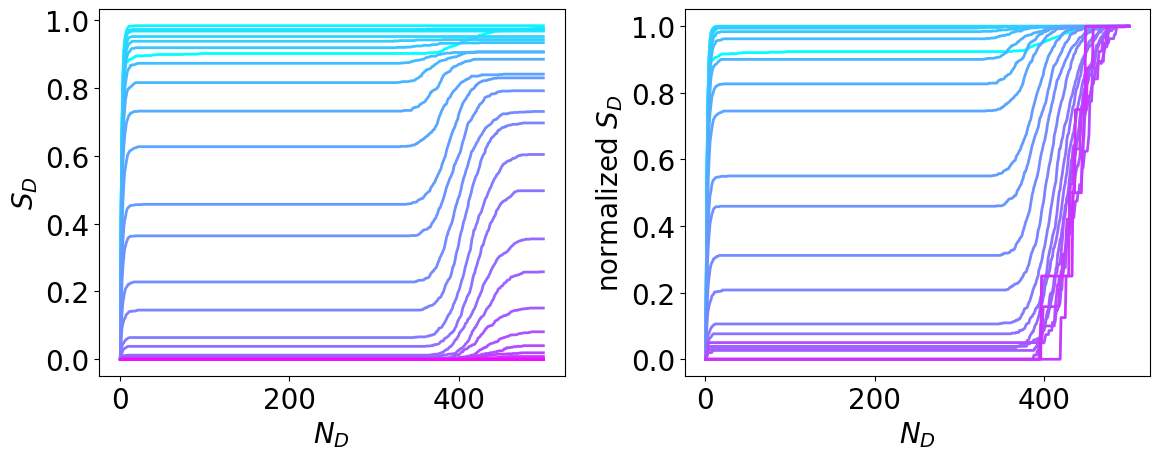

In [17]:
# file_idx = 77
file_idx = 5
file_name = "../data/240530/240530_%d"%(file_idx)
nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nmeas_l)))
S_snd_arr = raw[:,1].reshape((len(pertb_l),len(nmeas_l)))
S_trd_arr = raw[:,2].reshape((len(pertb_l),len(nmeas_l)))
S_fth_arr = raw[:,3].reshape((len(pertb_l),len(nmeas_l)))

plt.figure(figsize=(12,5))
cmap = mpl.colormaps['cool']

# plt.xlim([0,100])
plt.subplot(1,2,1)
for pertb_idx in range(0,len(pertb_l),1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:],c=cmap((pertb_idx)/len(pertb_l)))
    plt.xlabel("$N_D$")
    plt.ylabel("$S_D$")

plt.subplot(1,2,2)
for pertb_idx in range(0,len(pertb_l),1):
    if np.average(S_ave_arr[pertb_idx,-10:]) == 0:
        print(pertb_l[pertb_idx])
        break
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:] / np.average(S_ave_arr[pertb_idx,-10:]),c=cmap((pertb_idx)/len(pertb_l)))
    plt.xlabel("$N_D$")
    plt.ylabel("normalized $S_D$")

plt.tight_layout()

scaling of measurements at 0.5*nBsites

0.3
0.28
0.26


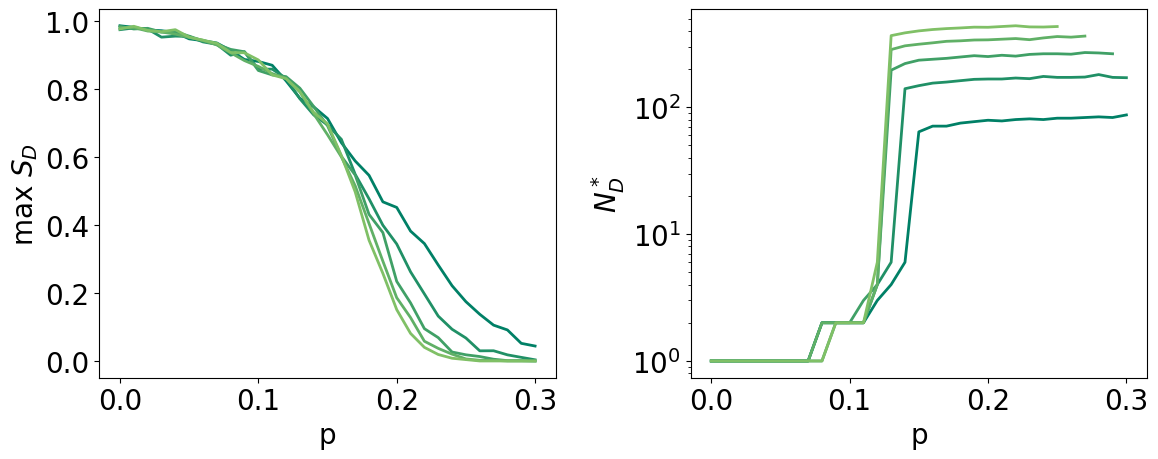

In [11]:
plt.figure(figsize=(12,5))
cmap = mpl.colormaps['summer']
nAsites = 1
# nsteps=0.5*nBsites
# for file_idx in [31,32,33,34]:
for nB_idx,file_idx in enumerate([1,2,3,4,5]):
# nAsites = 5
# file_idx_l = (40+5*(nAsites-1))+np.array([1,2,3,4,5])
# for nB_idx,file_idx in enumerate(file_idx_l):
    file_name = "../data/240530/240530_%d"%(file_idx)
    nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
    pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

    raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
    S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nmeas_l)))
    S_snd_arr = raw[:,1].reshape((len(pertb_l),len(nmeas_l)))
    S_trd_arr = raw[:,2].reshape((len(pertb_l),len(nmeas_l)))
    S_fth_arr = raw[:,3].reshape((len(pertb_l),len(nmeas_l)))

    pertb_upper_idx = len(pertb_l)
    mid_point_l = []
    for pertb_idx in range(0,len(pertb_l),1):
        if np.average(S_ave_arr[pertb_idx,-10:]) == 0:
            pertb_upper_idx = pertb_idx
            print(pertb_l[pertb_idx])
            break
        min_idx = np.argmin(np.abs(S_ave_arr[pertb_idx,:]-(nAsites/2)*np.average(S_ave_arr[pertb_idx,-10:])))
        mid_point_l.append(min_idx)
    
    mid_point_l = np.array(mid_point_l)
    plt.subplot(1,2,1)
    plt.plot(pertb_l,np.average(S_ave_arr[:,-10:],axis=1),c=cmap(nB_idx/8))
    plt.xlabel("p")
    plt.ylabel("max $S_D$")
    plt.subplot(1,2,2)
    plt.plot(pertb_l[0:pertb_upper_idx],mid_point_l,c=cmap(nB_idx/8))
    # plt.plot(pertb_l[0:pertb_upper_idx],mid_point_l/(100*(nB_idx+1)),c=cmap(nB_idx/4))
    plt.xlabel("p")
    plt.ylabel("$N_D^*$")
    plt.yscale('log')

plt.tight_layout()
    


## Rule 110 MIPT moments nsteps=3.5*Bsites
Asites=1,Bsites=100*i,nsteps=3.5*Bsites, pertb=0:0.25:0.01, 11-15
Asites=1,Bsites=100*i,nsteps=3.5*Bsites, pertb=0.15:0.25:0.002, 21-25

0.178


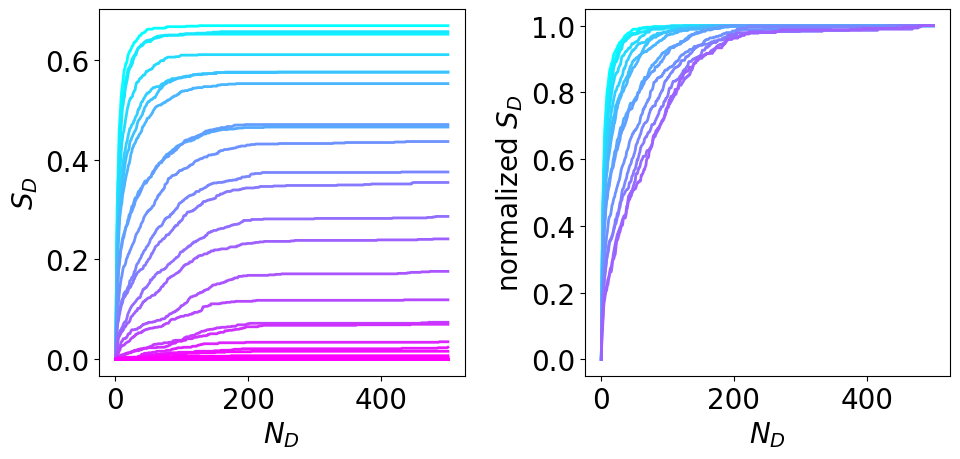

In [14]:
# file_idx = 77
file_idx = 25
file_name = "../data/240530/240530_%d"%(file_idx)
nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nmeas_l)))
S_snd_arr = raw[:,1].reshape((len(pertb_l),len(nmeas_l)))
S_trd_arr = raw[:,2].reshape((len(pertb_l),len(nmeas_l)))
S_fth_arr = raw[:,3].reshape((len(pertb_l),len(nmeas_l)))

plt.figure(figsize=(10,5))
cmap = mpl.colormaps['cool']

# plt.xlim([0,100])
plt.subplot(1,2,1)
for pertb_idx in range(0,len(pertb_l),1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:],c=cmap((pertb_idx)/(len(pertb_l)-30)))
    plt.xlabel("$N_D$")
    plt.ylabel("$S_D$")

plt.subplot(1,2,2)
for pertb_idx in range(0,len(pertb_l),1):
    if np.average(S_ave_arr[pertb_idx,-10:]) < 0.2:
        print(pertb_l[pertb_idx])
        break
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:] / np.average(S_ave_arr[pertb_idx,-10:]),c=cmap((pertb_idx)/(len(pertb_l)-30)))
    plt.xlabel("$N_D$")
    plt.ylabel("normalized $S_D$")

plt.tight_layout()

scaling of measurements at 3.5*nBsites

0.2
0.19
0.18
0.18


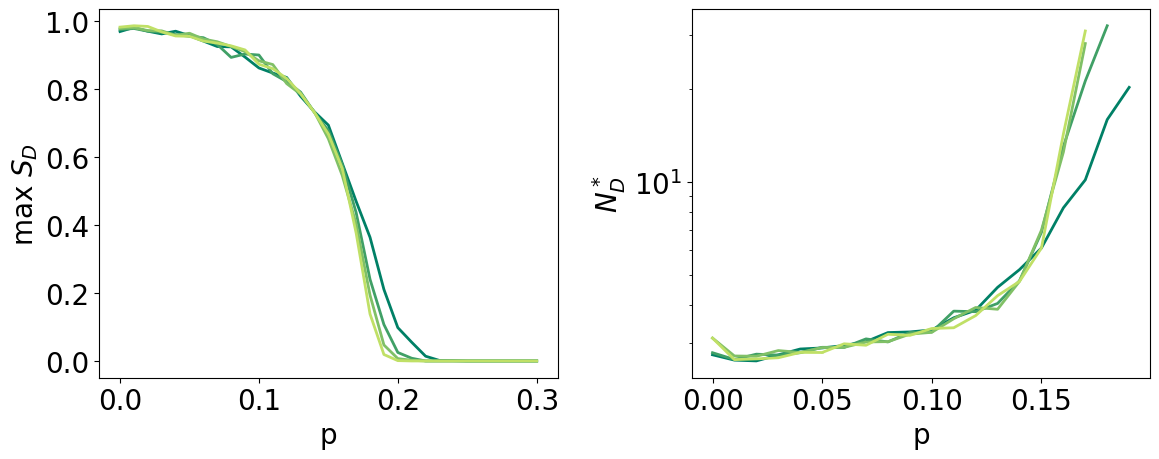

In [20]:
plt.figure(figsize=(12,5))
cmap = mpl.colormaps['summer']
# nAsites = 5
file_idx_l = (10)+np.array([1,2,3,4])

for nB_idx,file_idx in enumerate(file_idx_l):
    file_name = "../data/240530/240530_%d"%(file_idx)
    nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
    pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

    raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
    S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nmeas_l)))
    S_snd_arr = raw[:,1].reshape((len(pertb_l),len(nmeas_l)))
    S_trd_arr = raw[:,2].reshape((len(pertb_l),len(nmeas_l)))
    S_fth_arr = raw[:,3].reshape((len(pertb_l),len(nmeas_l)))

    def fit_exp(x,x0,A):
        return A*(1-np.exp(-x/x0))

    meas0_l = []
    meas0_std_l = []
    pertb_upper_idx = 220
    for pertb_idx in range(0,pertb_upper_idx ,1):
        if np.average(S_ave_arr[pertb_idx,-10:]) <= 0.2:
            pertb_upper_idx = pertb_idx
            print(pertb_l[pertb_idx])
            break
        popt, pcov = curve_fit(fit_exp, nmeas_l, S_ave_arr[pertb_idx,:],p0=(10,np.average(S_ave_arr[pertb_idx,-10:])))
        meas0_l.append(popt[0])
        meas0_std_l.append(np.sqrt(pcov[0,0]))
        # min_idx = np.argmin(np.abs(S_ave_arr[pertb_idx,:]-(1/2)*np.average(S_ave_arr[pertb_idx,-10:])))
        # meas0_l.append(min_idx)
    
    meas0_l = np.array(meas0_l)
    meas0_std_l = np.array(meas0_std_l)
    plt.subplot(1,2,1)
    plt.plot(pertb_l,np.average(S_ave_arr[:,-10:],axis=1),c=cmap(nB_idx/4))
    plt.xlabel("p")
    plt.ylabel("max $S_D$")
    plt.subplot(1,2,2)
    # plt.errorbar(pertb_l[0:pertb_upper_idx],meas0_l,yerr=meas0_std_l)
    plt.errorbar(pertb_l[0:pertb_upper_idx],meas0_l,yerr=meas0_std_l/(100*(nB_idx+1)),c=cmap(nB_idx/4))
    # plt.plot(pertb_l[0:pertb_upper_idx],meas0_l,c=cmap(nB_idx/4))
    plt.xlabel("p")
    plt.ylabel("$N_D^*$")
    plt.yscale('log')
    # plt.xlim([0,0.25])
    # plt.ylim([0,10])
    
plt.tight_layout()

## Rule 110 Running exponents
Asites=1, Bsites=100:400, nsteps=3.5*nBsite p=0.15:0.004:0.19, 31-34 oneMeas 1k nsim

Asites=1, Bsites=400, nsteps=3.5*nBsite p=0.17:0.0004:0.174, 444 oneMeas 1k nsim

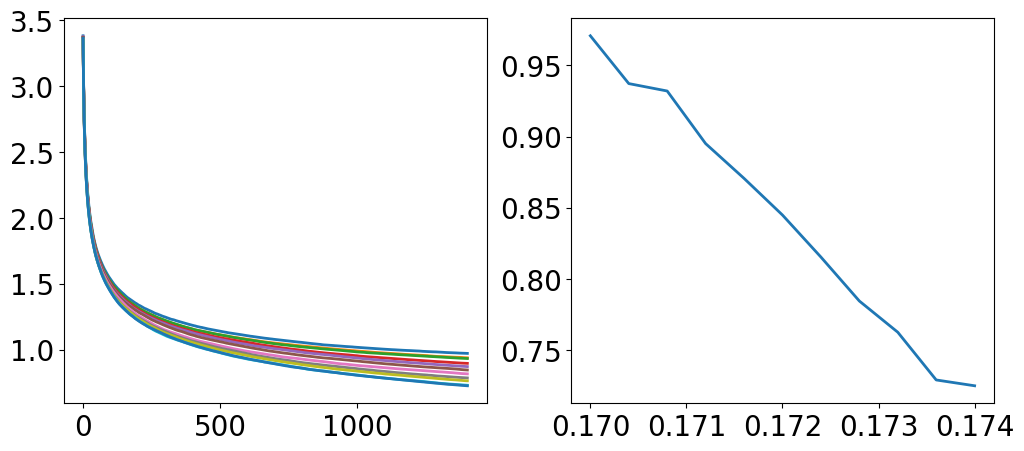

In [50]:
file_idx = 44

file_name = "../data/240530/240530_%d"%(file_idx)
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for pertb_idx in range(0,len(pertb_l),1):
    plt.plot(nstep_l,S_ave_arr[pertb_idx,:])
#     plt.plot(np.arange(2*nsteps_l[-1]), S_ave_arr[pertb_idx,10,:])
plt.subplot(1,2,2)
plt.plot(pertb_l,S_ave_arr[:,-1])

/var/folders/d0/tvg6bvm9377bmz53zj2vwnf00000gn/T/ipykernel_68527/331046197.py:14: RuntimeWarning: divide by zero encountered in divide
  plt.plot((1/np.arange(int(len(nstep_l)/base))), delta_l, '.-')
/var/folders/d0/tvg6bvm9377bmz53zj2vwnf00000gn/T/ipykernel_68527/331046197.py:17: RuntimeWarning: divide by zero encountered in divide
  slope, intercept = np.polyfit((1/np.arange(int(len(nstep_l)/base)))[-nfit:], delta_l[-nfit:], deg=1)


Text(0, 0.5, '$\\delta(t)$')

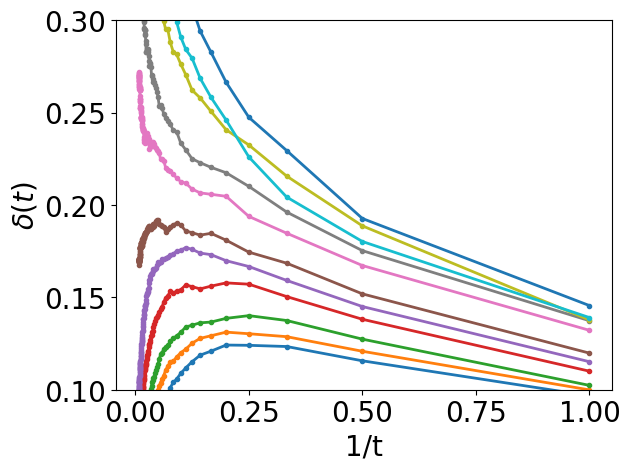

In [59]:
base = 10

slope_l = []
intercept_l = []
for pertb_idx, pertb in enumerate(pertb_l):
    # if pertb < 0.15 or pertb > 0.21:
    #     continue
    # if pertb_idx < 5 or pertb_idx > 6:
    #     continue
    S_l = S_ave_arr[pertb_idx,:]
    delta_l = []
    for t in range(int(len(nstep_l)/base)):
        delta_l.append(np.emath.logn(base,S_l[t]/S_l[base*t]))
    plt.plot((1/np.arange(int(len(nstep_l)/base))), delta_l, '.-')
    # plt.plot((1/np.arange(int(len(nstep_l)/base)))[-50:], delta_l[-50:], '.-')
    nfit = 10
    slope, intercept = np.polyfit((1/np.arange(int(len(nstep_l)/base)))[-nfit:], delta_l[-nfit:], deg=1)
    slope_l.append(slope)
    intercept_l.append(intercept)

    # for t in range(int(len(nstep_l)/10)):
    #     delta_l.append(np.log10(S_l[t]/S_l[2*t]))
    # plt.plot(1/np.arange(int(len(nstep_l)/10)), delta_l)

# plt.xlim([1/int(len(nstep_l)/base),0.1])
plt.ylim([0.1,0.3])
plt.xlabel("1/t")
plt.ylabel("$\delta(t)$")

In [42]:
pertb_l

array([0.15 , 0.154, 0.158, 0.162, 0.166, 0.17 , 0.174, 0.178, 0.182,
       0.186, 0.19 ])

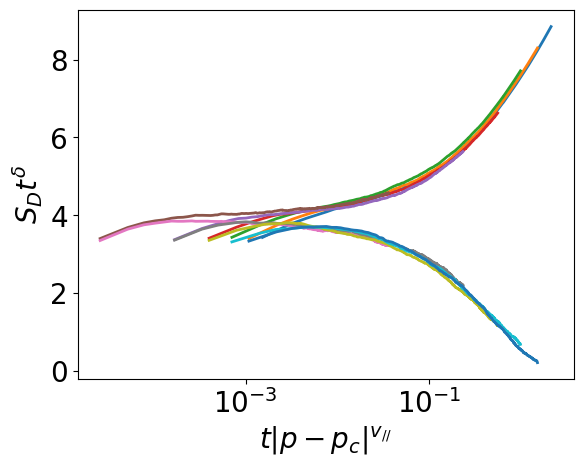

In [61]:
file_idx = 34

file_name = "../data/240530/240530_%d"%(file_idx)
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nstep_l)))

nv = 1.7
pc = 0.172
delta = 0.21
for pertb_idx in range(0,len(pertb_l),1):
    xplot = nstep_l * np.abs(pertb_l[pertb_idx]-pc)**nv
    yplot = S_ave_arr[pertb_idx,:] * nstep_l**delta
    # xplot = nstep_l[-190:] * np.abs(pertb_l[pertb_idx]-pc)**nv
    # yplot = S_ave_arr[pertb_idx,-190:] * nstep_l[-190:]**delta
    plt.plot(xplot,yplot)

# plt.xlim([1e-3,1e-1])
plt.xlabel("$t |p-p_c|^{v_{//}}$")
plt.ylabel("$S_D t^{\delta}$")
plt.xscale('log')